<a href="https://colab.research.google.com/github/boreumlee/traffic/blob/main/%EA%B5%90%ED%86%B5%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

# 랜덤 데이터 생성 함수
def generate_traffic_data(start_date, days):
  date_range = pd.date_range(start=start_date, periods=days, freq='D') # freq='D' ==> day 를 뜻한다는 것
  traffic_data = {
      'date': date_range,
      'traffic_volume': np.random.randint(500, 5000, size=len(date_range)) # 교통량 (500~5000 랜덤값)
  }
  return pd.DataFrame(traffic_data)

# 1년치 데이터 생성
df = generate_traffic_data('2024-01-01', 365)
print(df.head())

        date  traffic_volume
0 2024-01-01             605
1 2024-01-02            3988
2 2024-01-03            4658
3 2024-01-04            2971
4 2024-01-05            4759


In [4]:

# HDF5 파일로 저장
# HDF5 파일 안에 데이터를 저장할 이름(그룹) => key:'traffic'
# HDF5는 하나의 파일 안에 여러 개의 데이터셋을 저장 가넝
# key를 통해 각 데이터 구분하는 역할을 함
# JSON파일에서 key-value 느낌
# mode='w' (기존 파일 덮어쓰기(write)), mode='a' (기존 데이터 유지하고 새로운 데이터 추가(append))

# 예)
# df1.to_hdf('data.h5', key='traffic', mode='w')  # 교통량 데이터 저장
# df2.to_hdf('data.h5', key='weather', mode='a')  # 날씨 데이터 추가 저장


df.to_hdf('traffic_data.h5', key='traffic', mode='w')

# 저장된 파일 불러오기
df_loaded=pd.read_hdf('traffic_data.h5', key='traffic')
print(df_loaded.head())

        date  traffic_volume
0 2024-01-01             605
1 2024-01-02            3988
2 2024-01-03            4658
3 2024-01-04            2971
4 2024-01-05            4759


In [7]:
import time

df=pd.read_hdf('traffic_data.h5', key='traffic')

def compute_mean_traffic(df):
  return df.groupby('date')['traffic_volume'].mean()

start_time=time.time()
result = compute_mean_traffic(df)
end_time=time.time()

print('하루 평균 교통량 계산')
print(result.head())
print(f'실행 시간: {end_time - start_time:.2f}초')

하루 평균 교통량 계산
date
2024-01-01     605.0
2024-01-02    3988.0
2024-01-03    4658.0
2024-01-04    2971.0
2024-01-05    4759.0
Name: traffic_volume, dtype: float64
실행 시간: 0.01초


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# HDF5 파일에서 데이터 로드
df = pd.read_hdf('traffic_data.h5', key='traffic')

# 날짜를 인덱스로 설정
df.set_index('date', inplace=True)

print(df.head())

            traffic_volume
date                      
2024-01-01             605
2024-01-02            3988
2024-01-03            4658
2024-01-04            2971
2024-01-05            4759


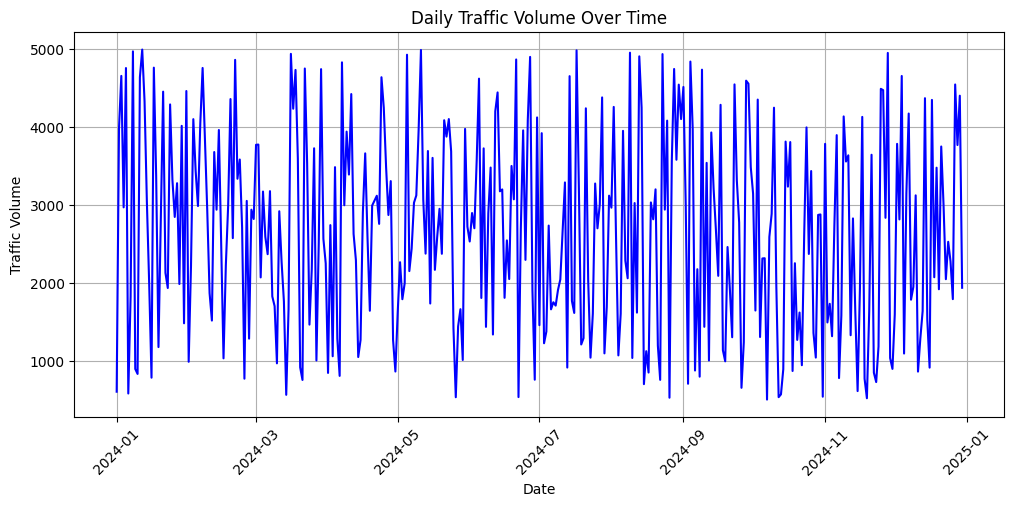

In [9]:
plt.figure(figsize=(12,5))
# lineplot 선 그래프
sns.lineplot(data=df, x=df.index, y='traffic_volume', color='blue')

plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.title('Daily Traffic Volume Over Time')
plt.xticks(rotation=45) # 날짜 레이블 겹치지 않게 회전
plt.grid() # 보조선 추가

plt.show()